In [1]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")

import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat

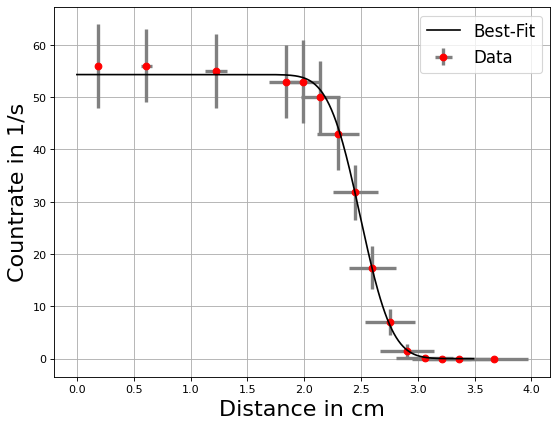

[[Model]]
    Model(erfc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 15
    # variables        = 3
    chi-square         = 0.38819799
    reduced chi-square = 0.03234983
    Akaike info crit   = -48.8143500
    Bayesian info crit = -46.6901994
    R-squared          = 0.99995513
[[Variables]]
    A:  27.1625925 +/- 0.28435115 (1.05%) (init = 25.907)
    B:  3.22441281 +/- 0.07926235 (2.46%) (init = 7.829)
    C:  8.04121943 +/- 0.21304204 (2.65%) (init = 17.657)
[[Correlations]] (unreported correlations are < 0.100)
    C(B, C) = 0.997
    C(A, C) = -0.396
    C(A, B) = -0.365
0.1835677276091784
0.02128759398975869
0.611892425363928
0.05166286430889802
1.223784850727856
0.09987083186040935
1.8356772760917839
0.14882675242142365
1.988650382432766
0.16110294295884456
2.1416234887737478
0.17338770055338168
2.29459659511473
0.18567932479377727
2.447569701455712
0.19797653671092527
2.600542807796694
0.21027835599444628
2.7535159

In [2]:
with open("Data/Data.txt") as tf:
    data = np.genfromtxt(tf).T


#minimum error value
data[2] = data[2].clip(0.1)



#annahme abstand quelle schirm 6.5 +-0.5 cm
xerr = np.full(len(data[0]),2.5)
laeng = up.uarray(data[0],xerr)
abst = ufloat(6.2,0.5)
for i in range(len(laeng)):
    laeng[i] = laeng[i]*abst/1013.25





data[0] = up.nominal_values(laeng)
xerr = up.std_devs(laeng)


res = f.erfc_fit(data[1],data[0],data[2])

plt.figure(figsize=(8,6),dpi=80,linewidth=50)
plt.errorbar(data[0],data[1],yerr=data[2],xerr=xerr,fmt='o',ecolor='gray',color='r', elinewidth=3, capsize=0,zorder=5,label="Data")
plt.plot(np.arange(0,3.5,0.01),res.eval(x=np.arange(0,3.5,0.01)),zorder=10,color='k',linestyle='-',alpha=1,label="Best-Fit")

plt.xlabel("Distance in cm",fontsize=20)
plt.ylabel("Countrate in 1/s",fontsize=20)
plt.grid()
plt.legend(fontsize = 15)
plt.savefig("Results/reangedetermination.pdf")
plt.show()


print(res.fit_report())

for i in range(len(data[0])):
    if data[1,i]>0:
        print(data[0,i])
        print(xerr[i])
print('here')

In [3]:
B = ufloat(res.params["B"].value,res.params["B"].stderr)
C = ufloat(res.params["C"].value,res.params["C"].stderr)
print(C/B)

2.49+/-0.09
